In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Get data

In [16]:
df = pd.read_csv('Classified Data.csv')
df.columns

Index(['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF',
       'HQE', 'NXJ', 'TARGET CLASS'],
      dtype='object')

In [4]:
df.head()

Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0           0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608   
1           1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450   
2           2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781   
3           3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128   
4           4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727   

        FDJ       PJF       HQE       NXJ  TARGET CLASS  
0  0.759697  0.643798  0.879422  1.231409             1  
1  0.675334  1.013546  0.621552  1.492702             0  
2  1.626351  1.154483  0.957877  1.285597             0  
3  1.409708  1.380003  1.522692  1.153093             1  
4  1.115596  0.646691  1.463812  1.419167             1

In [19]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [20]:
df.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.643798  0.879422  1.231409             1  
1  1.013546  0.621552  1.492702             0  
2  1.154483  0.957877  1.285597             0  
3  1.380003  1.522692  1.153093             1  
4  0.646691  1.463812  1.419167             1

## standarding the varaible

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [23]:
scaled_feature=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [24]:
df_final=pd.DataFrame(scaled_feature,columns=df.columns[:-1])
df_final.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   

        PJF       HQE       NXJ  
0 -1.482368 -0.949719 -0.643314  
1 -0.202240 -1.828051  0.636759  
2  0.285707 -0.682494 -0.377850  
3  1.066491  1.241325 -1.026987  
4 -1.472352  1.040772  0.276510

In [31]:
scaled_feature

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

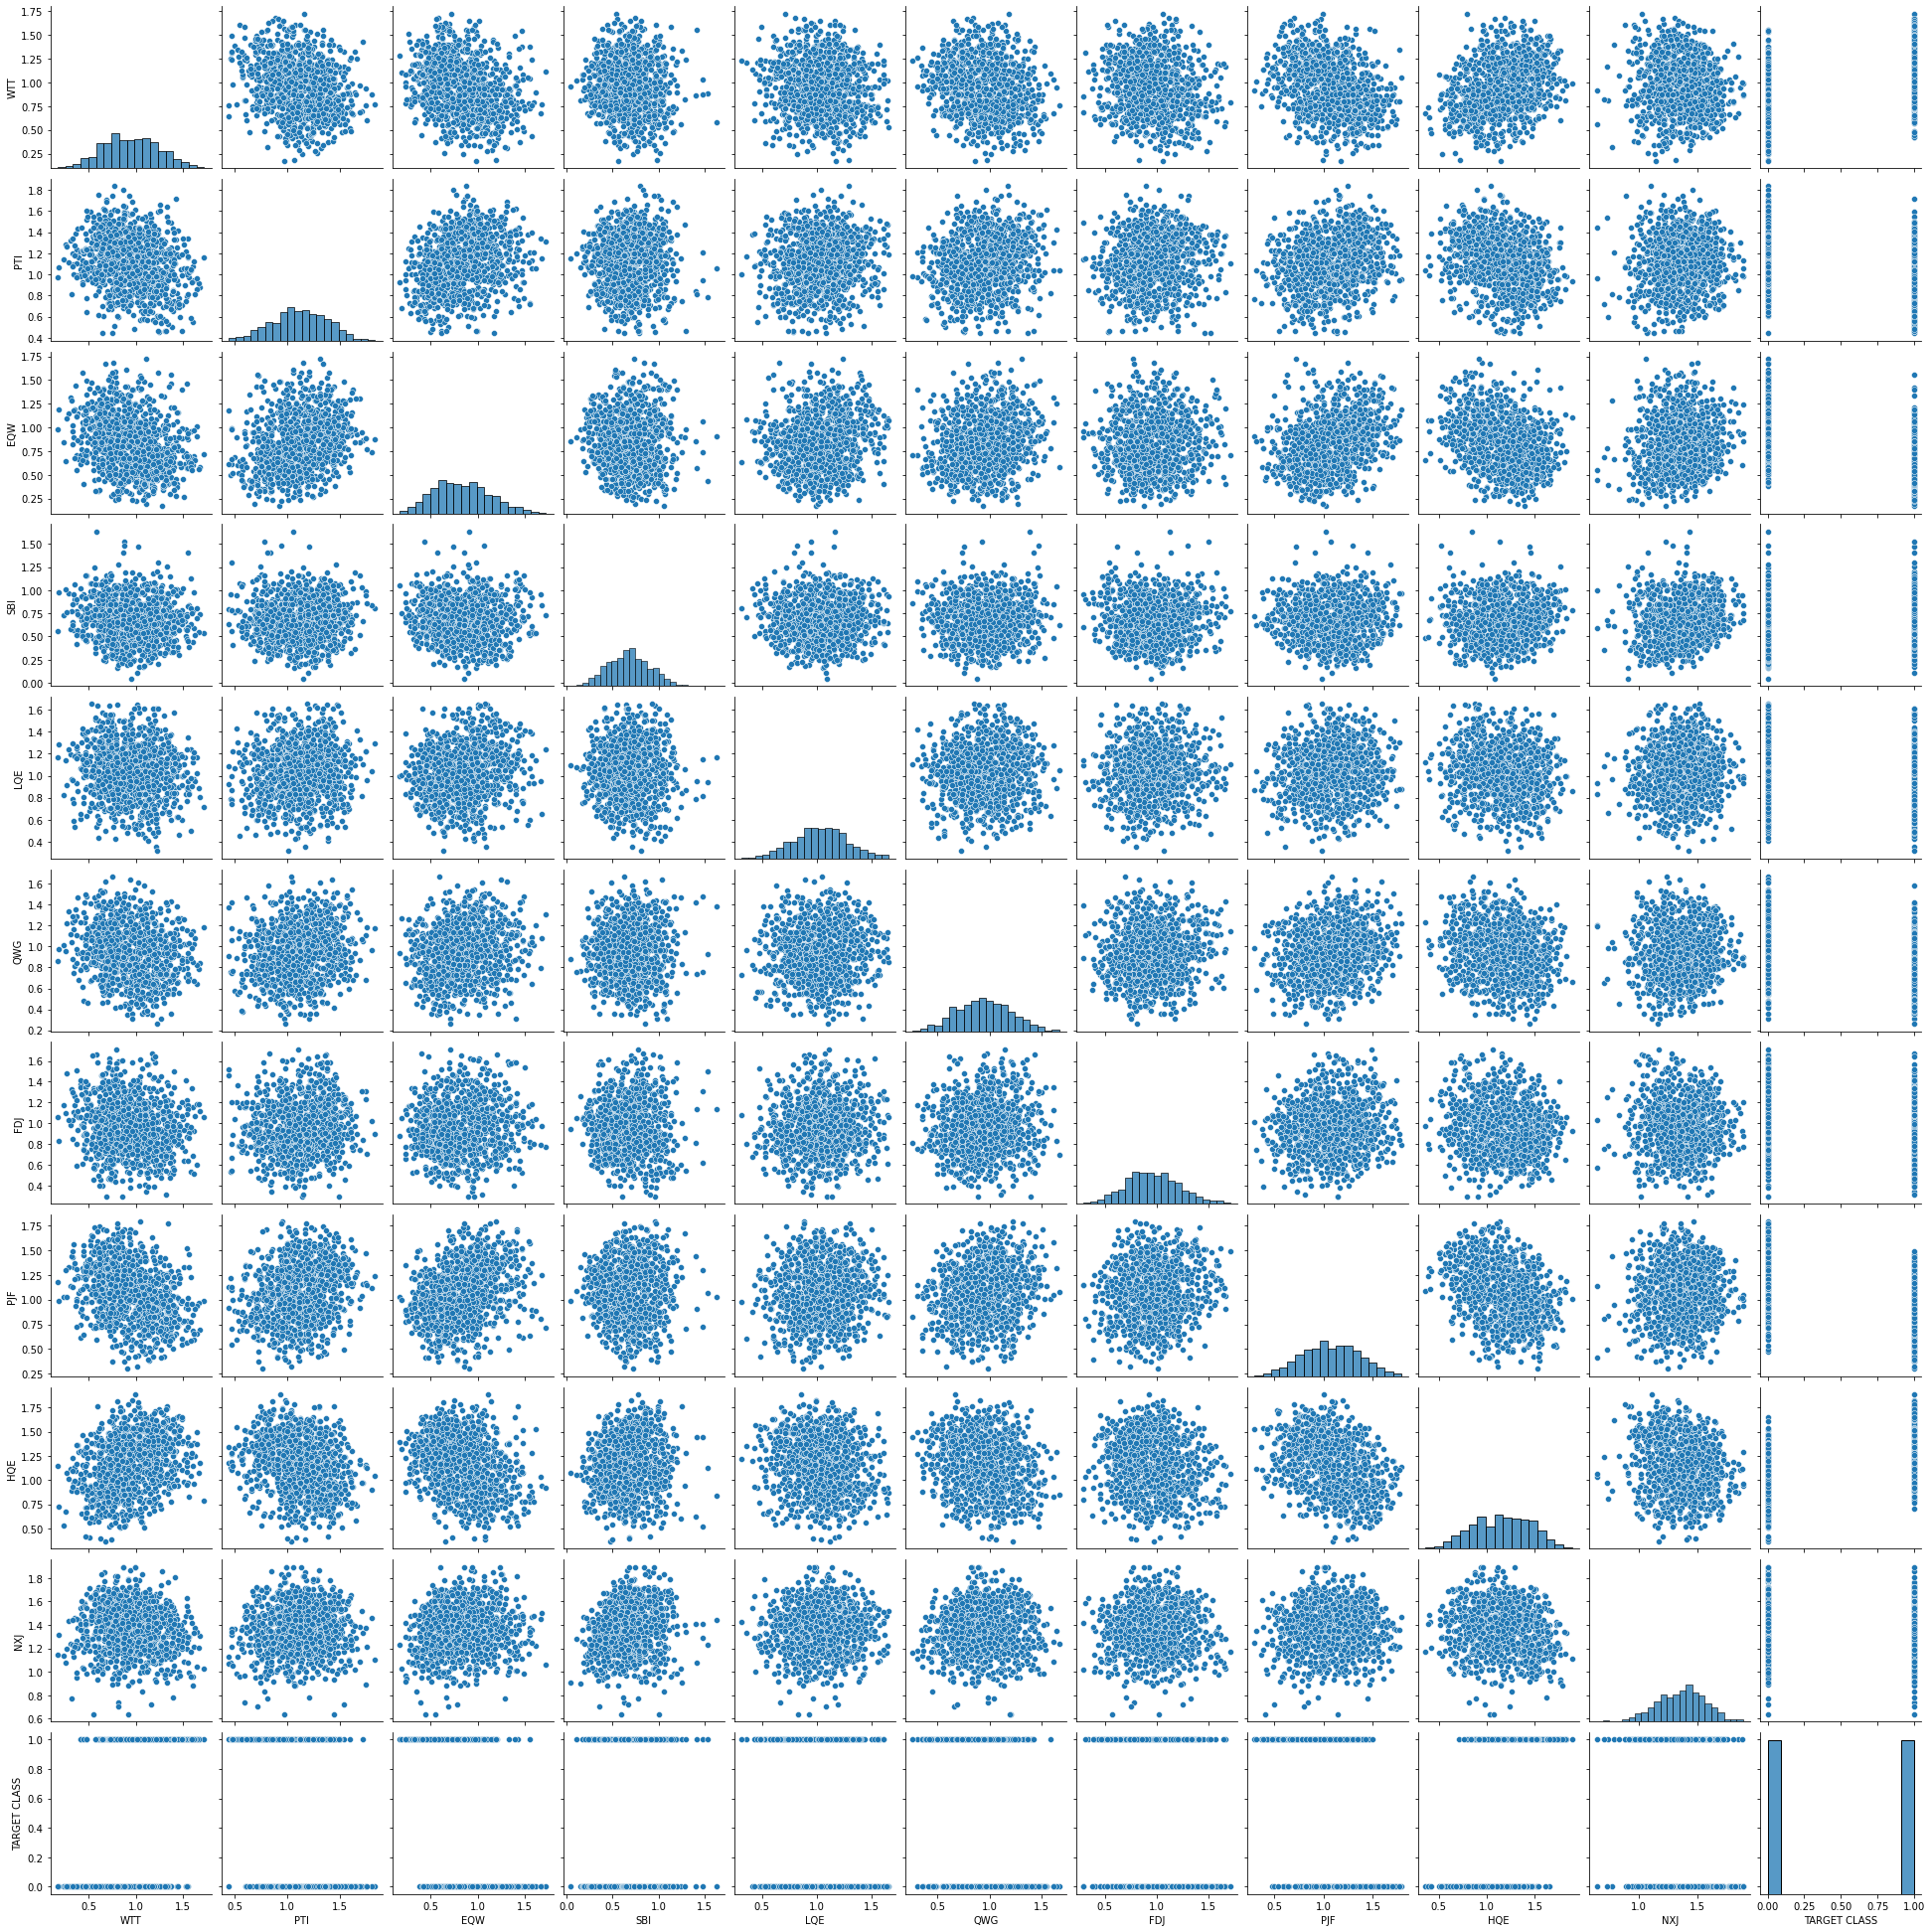

In [25]:
sns.pairplot(df)

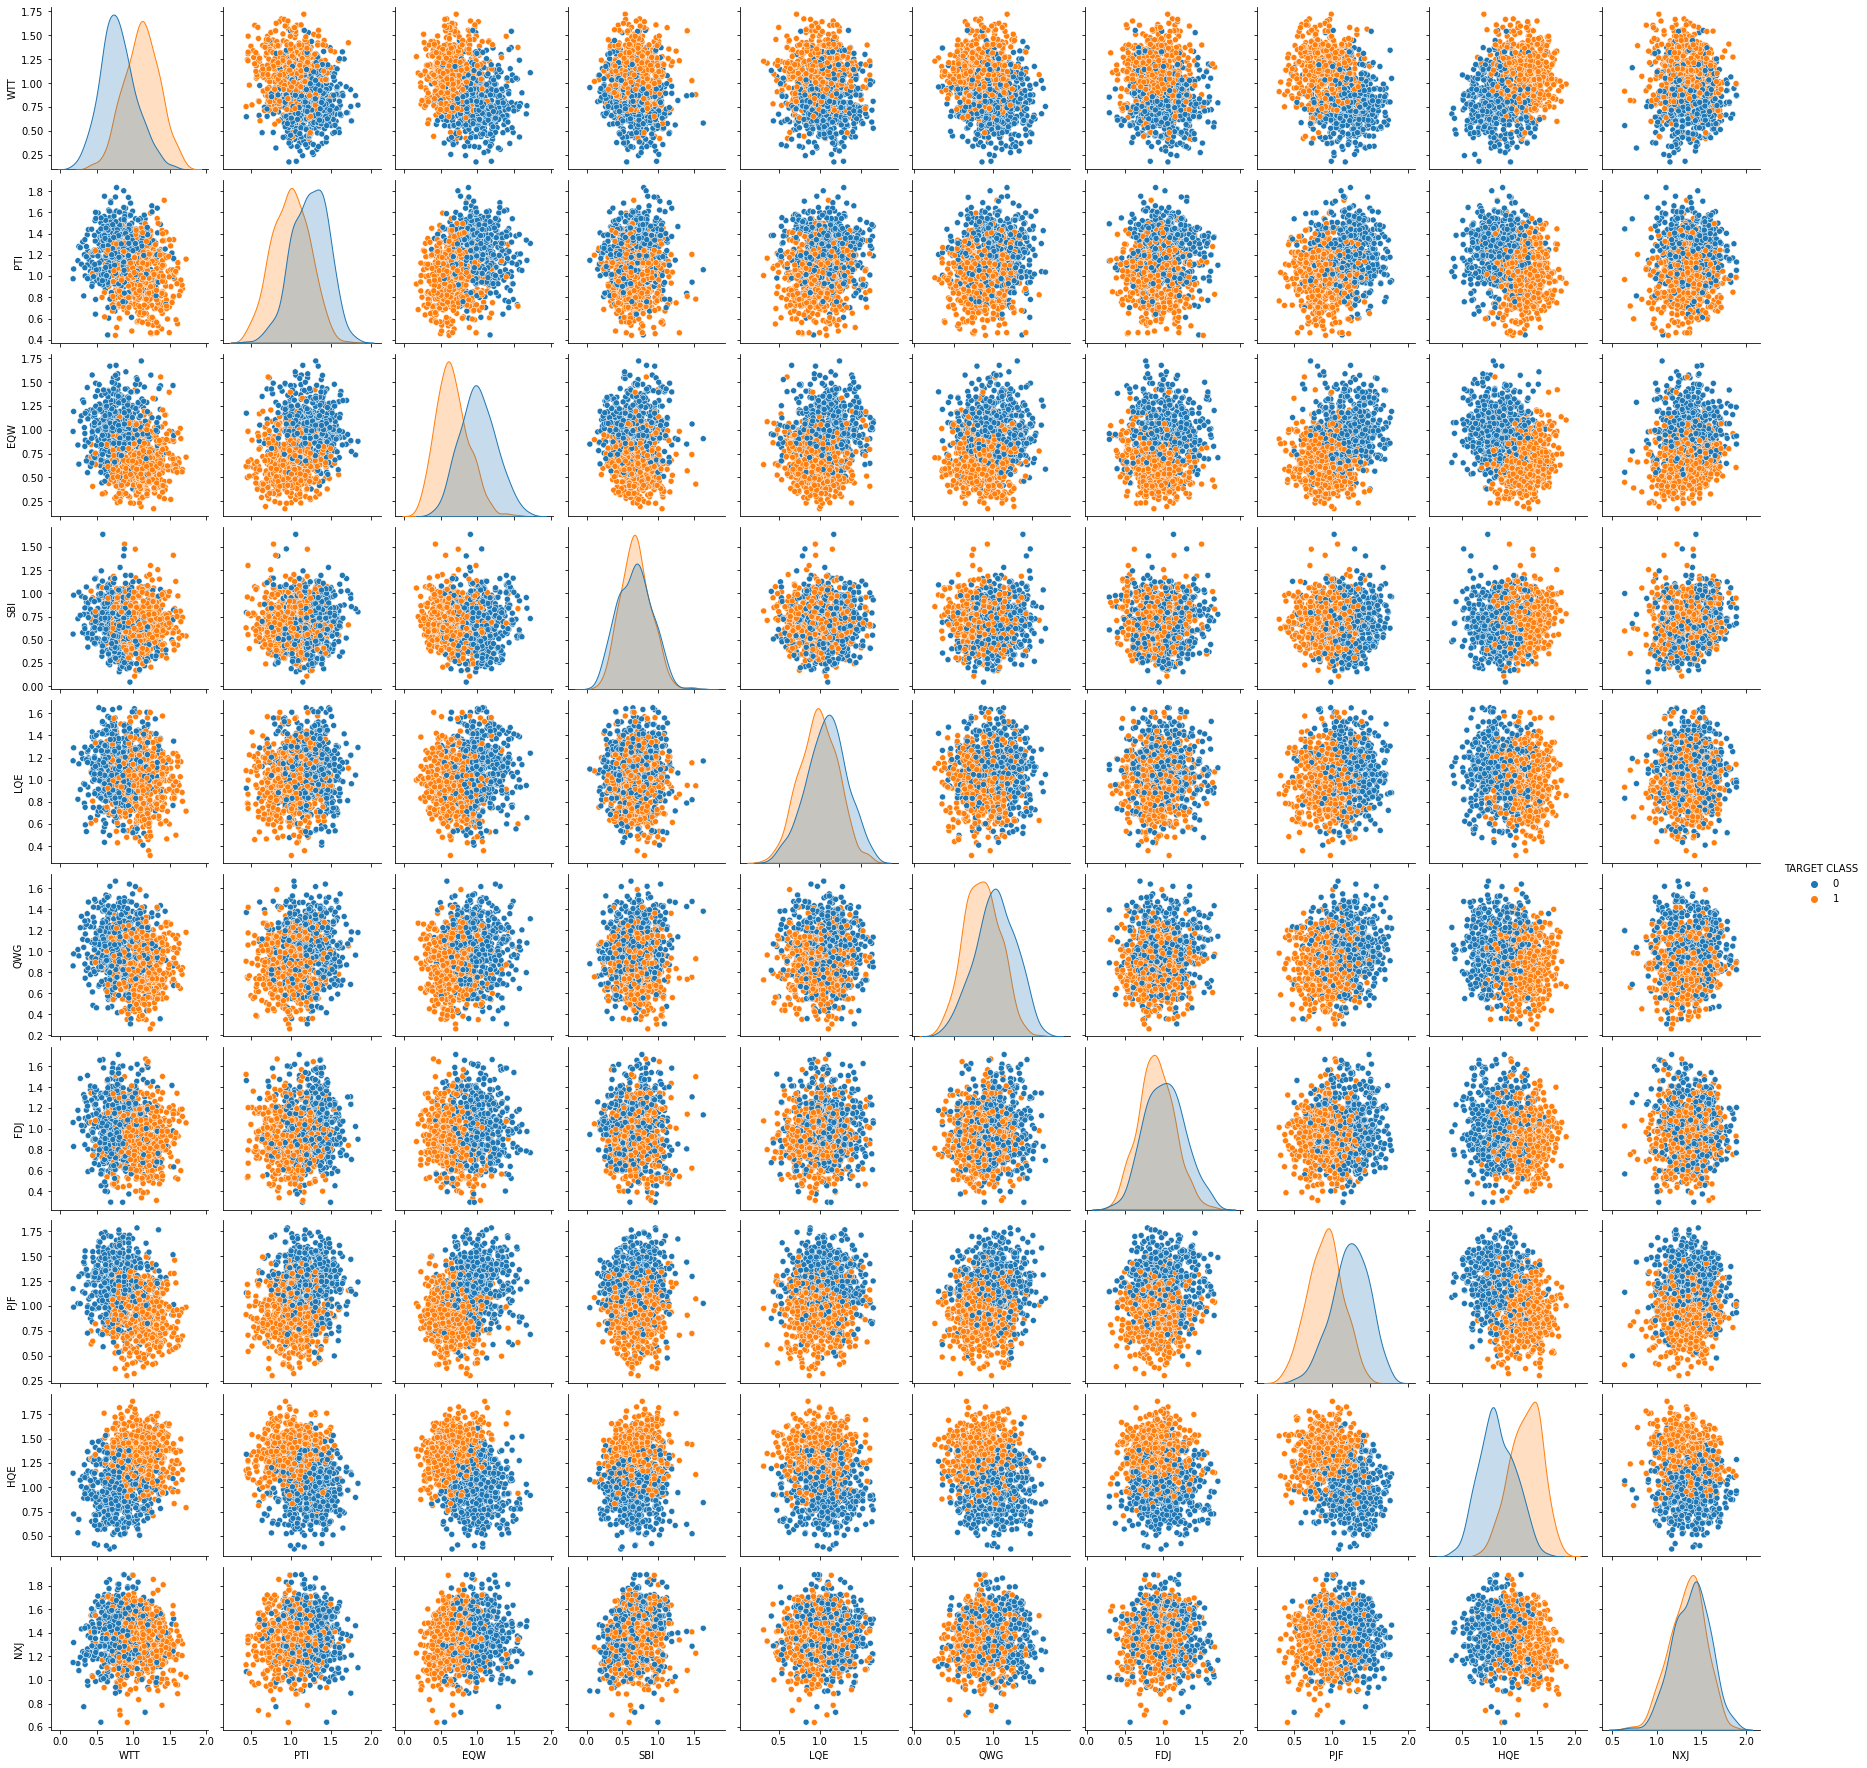

In [26]:
sns.pairplot(df,hue='TARGET CLASS')

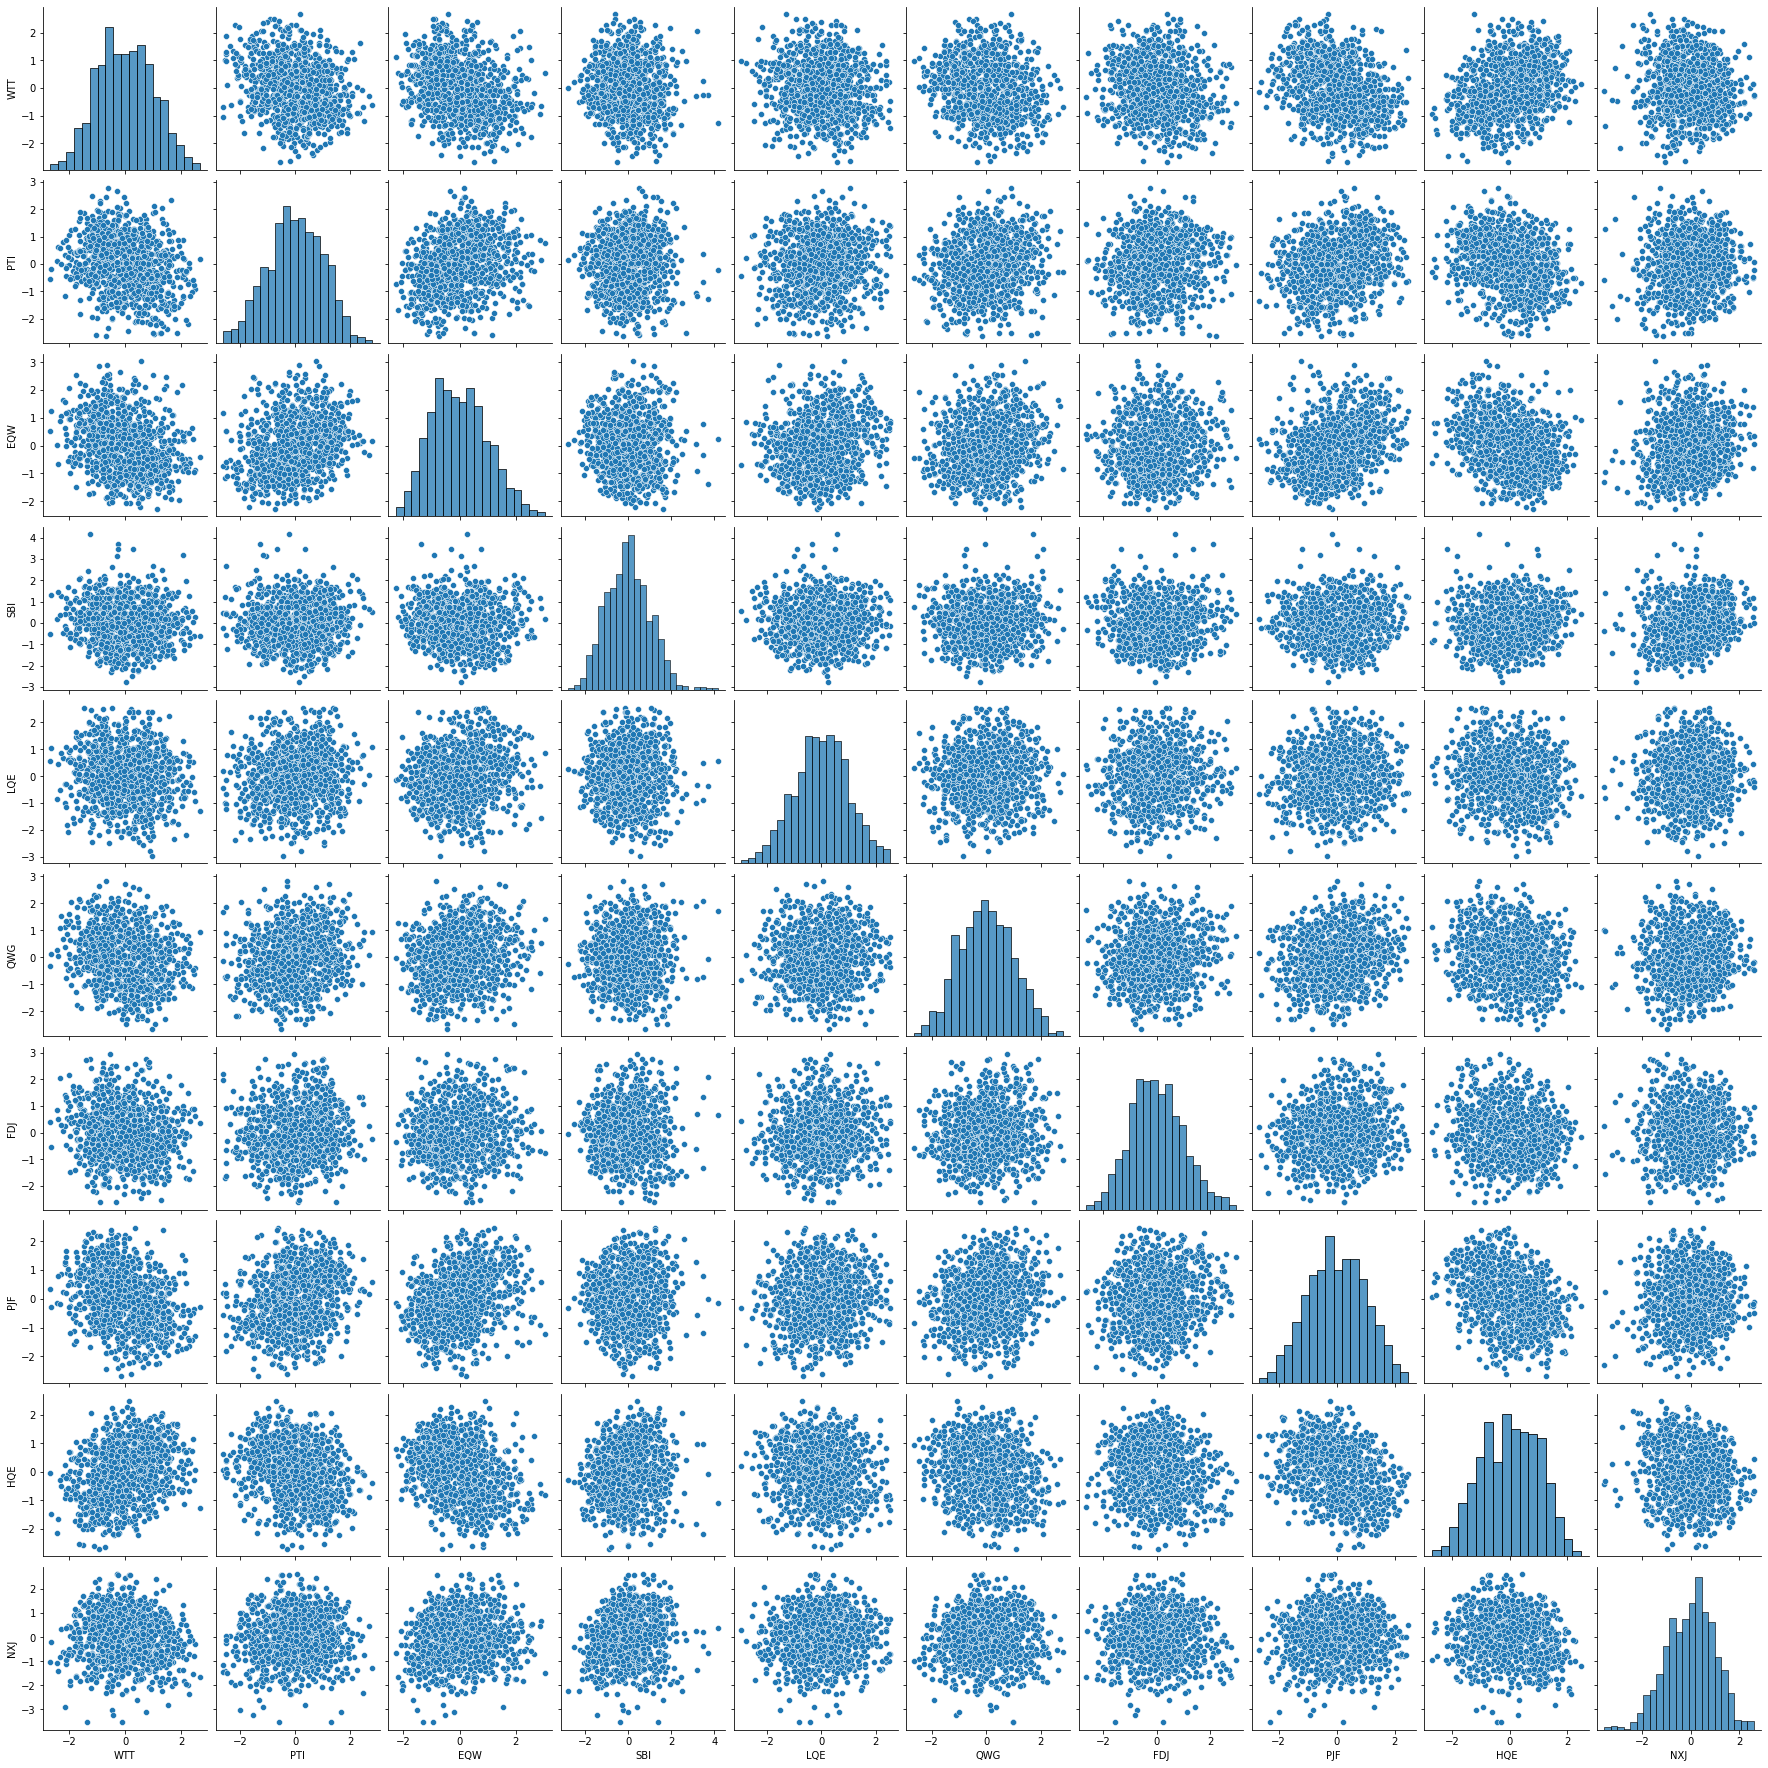

In [27]:
sns.pairplot(df_final)

In [29]:
y=df['TARGET CLASS']
y

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    1
Name: TARGET CLASS, Length: 1000, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(df_final,y,test_size=0.30)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [40]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [41]:
pred = knn.predict(x_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [43]:
print(confusion_matrix(y_test,pred))

[[129  29]
 [  9 133]]


In [44]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       158
           1       0.82      0.94      0.88       142

    accuracy                           0.87       300
   macro avg       0.88      0.88      0.87       300
weighted avg       0.88      0.87      0.87       300



In [ ]:
# To get more idea on classification report:
# ==========================================
# ===========================================

# https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html#:~:text=not%20global%20accuracy.-,support,for%20stratified%20sampling%20or%20rebalancing.
# https://medium.com/@kennymiyasato/classification-report-precision-recall-f1-score-accuracy-16a245a437a5

#### Choosing K- Value

In [48]:
accuracy_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_final,y,cv=10)
    accuracy_rate.append(score)
    

In [49]:
accuracy_rate

[array([0.86, 0.95, 0.9 , 0.88, 0.9 , 0.88, 0.95, 0.94, 0.89, 0.96]),
 array([0.89, 0.94, 0.89, 0.92, 0.88, 0.9 , 0.89, 0.93, 0.9 , 0.95]),
 array([0.9 , 0.93, 0.93, 0.93, 0.9 , 0.91, 0.92, 0.94, 0.93, 0.99]),
 array([0.94, 0.94, 0.94, 0.94, 0.87, 0.91, 0.94, 0.92, 0.97, 0.97]),
 array([0.93, 0.95, 0.91, 0.94, 0.87, 0.92, 0.94, 0.92, 0.97, 0.94]),
 array([0.91, 0.94, 0.92, 0.93, 0.88, 0.93, 0.91, 0.94, 0.96, 0.97]),
 array([0.9 , 0.93, 0.93, 0.93, 0.88, 0.93, 0.93, 0.94, 0.97, 0.97]),
 array([0.92, 0.93, 0.93, 0.92, 0.88, 0.96, 0.92, 0.93, 0.97, 0.98]),
 array([0.92, 0.93, 0.93, 0.91, 0.89, 0.95, 0.92, 0.93, 0.96, 0.95]),
 array([0.94, 0.93, 0.93, 0.92, 0.89, 0.94, 0.92, 0.93, 0.97, 0.98]),
 array([0.95, 0.93, 0.92, 0.92, 0.9 , 0.94, 0.92, 0.94, 0.95, 0.96]),
 array([0.94, 0.94, 0.92, 0.92, 0.89, 0.94, 0.92, 0.94, 0.97, 0.97]),
 array([0.94, 0.94, 0.92, 0.92, 0.9 , 0.94, 0.92, 0.95, 0.97, 0.97]),
 array([0.94, 0.94, 0.92, 0.93, 0.9 , 0.95, 0.93, 0.95, 0.98, 0.97]),
 array([0.93, 0.95, 

In [50]:
accuracy_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_final,y,cv=10)
    accuracy_rate.append(score.mean())

In [51]:
accuracy_rate

[0.9109999999999999,
 0.909,
 0.9280000000000002,
 0.9339999999999999,
 0.9289999999999999,
 0.929,
 0.9310000000000003,
 0.9340000000000002,
 0.9289999999999999,
 0.9350000000000002,
 0.9329999999999998,
 0.9350000000000002,
 0.937,
 0.9410000000000001,
 0.9390000000000001,
 0.9390000000000001,
 0.9349999999999999,
 0.9360000000000002,
 0.9360000000000002,
 0.9360000000000002,
 0.9339999999999999,
 0.9359999999999999,
 0.93,
 0.933,
 0.9349999999999999,
 0.937,
 0.9380000000000001,
 0.938,
 0.937,
 0.9390000000000001,
 0.9360000000000002,
 0.943,
 0.937,
 0.9390000000000001,
 0.9390000000000001,
 0.9400000000000001,
 0.9369999999999999,
 0.943,
 0.9410000000000001]

In [52]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_final,y,cv=10)
    error_rate.append(1-score.mean())

In [53]:
error_rate

[0.08900000000000008,
 0.09099999999999997,
 0.07199999999999984,
 0.06600000000000006,
 0.07100000000000006,
 0.07099999999999995,
 0.06899999999999973,
 0.06599999999999984,
 0.07100000000000006,
 0.06499999999999984,
 0.06700000000000017,
 0.06499999999999984,
 0.06299999999999994,
 0.05899999999999994,
 0.06099999999999994,
 0.06099999999999994,
 0.06500000000000006,
 0.06399999999999983,
 0.06399999999999983,
 0.06399999999999983,
 0.06600000000000006,
 0.06400000000000006,
 0.06999999999999995,
 0.06699999999999995,
 0.06500000000000006,
 0.06299999999999994,
 0.061999999999999944,
 0.062000000000000055,
 0.06299999999999994,
 0.06099999999999994,
 0.06399999999999983,
 0.05700000000000005,
 0.06299999999999994,
 0.06099999999999994,
 0.06099999999999994,
 0.05999999999999994,
 0.06300000000000006,
 0.05700000000000005,
 0.05899999999999994]

Text(0, 0.5, 'Error Rate')

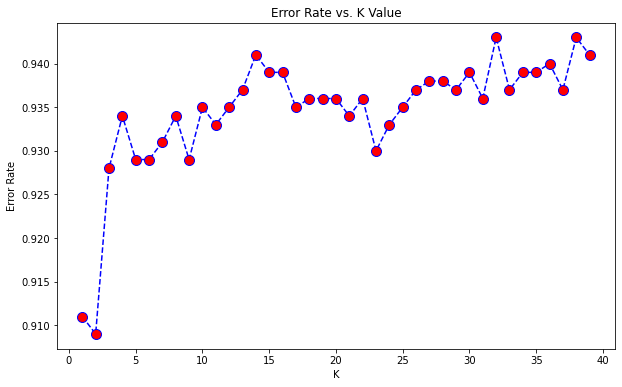

In [54]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [55]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [56]:
error_rate

[0.12666666666666668,
 0.10666666666666667,
 0.1,
 0.08666666666666667,
 0.08333333333333333,
 0.08333333333333333,
 0.08666666666666667,
 0.08,
 0.09,
 0.08666666666666667,
 0.09333333333333334,
 0.08666666666666667,
 0.09333333333333334,
 0.09,
 0.09333333333333334,
 0.1,
 0.09333333333333334,
 0.1,
 0.08666666666666667,
 0.08666666666666667,
 0.08666666666666667,
 0.08666666666666667,
 0.08666666666666667,
 0.08666666666666667,
 0.08666666666666667,
 0.09,
 0.09,
 0.09,
 0.09,
 0.08666666666666667,
 0.09,
 0.09666666666666666,
 0.09666666666666666,
 0.09666666666666666,
 0.1,
 0.09666666666666666,
 0.1,
 0.09666666666666666,
 0.10333333333333333]

Text(0, 0.5, 'Accuracy Rate')

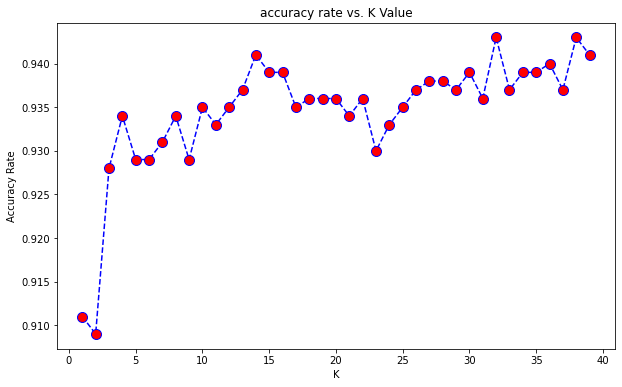

In [59]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('accuracy rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

Text(0, 0.5, 'Error Rate')

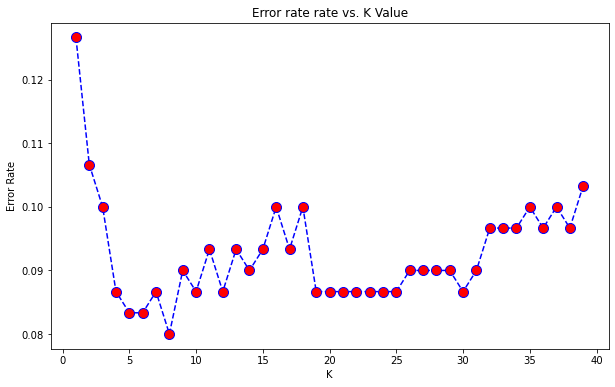

In [60]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
#         markerfacecolor='red', markersize=10)
plt.title('Error rate rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.9-0.94 Let's retrain the model with that and check the classification report!